In [1]:
# importing the libraries
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
class_to_index = {"cat": 0, "dog": 1}
data=[]

img_size = 100
def create_data():
    for category,label in class_to_index.items():
        path="data/" + category    
            
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))   
                new_img_array=cv2.resize(img_array,(img_size,img_size))              
                data.append([new_img_array,label])                                  
            except Exception as e:
                pass                                     
                
create_data()

In [4]:
# label to class mapping
index_to_class = {0 : 'cat', 1 : 'dog'}

In [5]:
print(len(data))

1008


In [6]:
print("One training example : ", data[0])
print("----------------------------------------------------")
print("image array shape : ", data[0][0].shape)
print("----------------------------------------------------")
print("category label : ", data[0][1])

One training example :  [array([[[ 41,  45,  40],
        [ 48,  45,  41],
        [ 50,  43,  40],
        ...,
        [ 96,  95,  91],
        [165, 185, 186],
        [163, 196, 199]],

       [[ 38,  42,  37],
        [ 41,  38,  34],
        [ 46,  38,  36],
        ...,
        [108, 104, 101],
        [161, 178, 181],
        [167, 195, 202]],

       [[ 41,  45,  40],
        [ 41,  38,  34],
        [ 47,  40,  37],
        ...,
        [ 98,  91,  88],
        [160, 174, 180],
        [170, 195, 205]],

       ...,

       [[ 21,  20,  22],
        [ 20,  19,  21],
        [ 20,  19,  21],
        ...,
        [ 78,  79,  97],
        [ 66,  69,  84],
        [ 33,  38,  50]],

       [[ 24,  23,  25],
        [ 18,  17,  20],
        [ 21,  20,  22],
        ...,
        [ 50,  54,  72],
        [ 30,  35,  50],
        [ 21,  27,  38]],

       [[ 29,  28,  30],
        [ 20,  19,  21],
        [ 24,  23,  25],
        ...,
        [ 77,  85, 102],
        [  8,  15,  30],

In [7]:
X, y = [], []
for i in range(len(data)):
    X.append(data[i][0])
    y.append(data[i][1])

In [8]:
print("One training example's shape : ", X[0].shape)
print("----------------------------------------------------")
print("One training example's y [label/category] : ", y[0])

One training example's shape :  (100, 100, 3)
----------------------------------------------------
One training example's y [label/category] :  0


In [9]:
# converting into suitable formats
X = np.array(X)
y = np.array(y)
y = pd.get_dummies(y)

In [10]:
# no. of training examples / batch size, height, width
print(X.shape)
print(y.shape)

(1008, 100, 100, 3)
(1008, 2)


In [51]:
# split data using train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, shuffle = True)

In [52]:
print("X train shape : ", X_train.shape)
print("y train shape : ", y_train.shape)
print("X test shape : ", X_test.shape)
print("y test shape : ", y_test.shape)

X train shape :  (705, 100, 100, 3)
y train shape :  (705, 2)
X test shape :  (303, 100, 100, 3)
y test shape :  (303, 2)


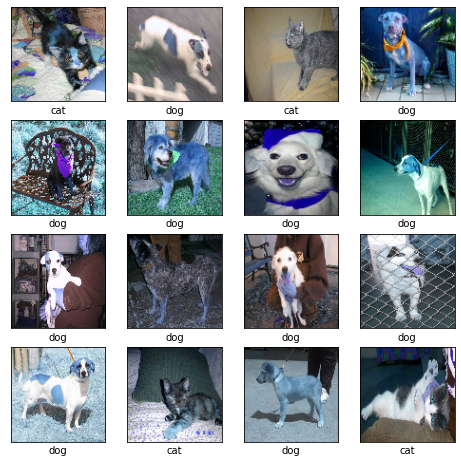

In [53]:
#plotting one dog and one cat image

plt.figure(figsize = (8, 8))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_train[i].reshape(100, 100, 3))
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(index_to_class[y_train.iloc[i, 1]])

# Baseline model [No Transfer Learning]

In [54]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPool2D

In [55]:
# baseline model
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, activation = 'relu', input_shape = (100, 100, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation = 'softmax'))

In [56]:
# summary of the baseline model
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 98, 98, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 76832)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              78676992  
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                

In [57]:
# we can notice that we have a lot of parameters.

In [58]:
# lets compile the model

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [59]:
# lets fit the model on training data.

history = model.fit(X_train, y_train, epochs = 5, batch_size = 64, verbose = 1)

Epoch 1/5
12/12 [==============================] - 6s 492ms/step - loss: 22.6074 - accuracy: 0.5518
Epoch 2/5
12/12 [==============================] - 6s 489ms/step - loss: 3.3201 - accuracy: 0.7901
Epoch 3/5
12/12 [==============================] - 6s 485ms/step - loss: 0.9468 - accuracy: 0.8794
Epoch 4/5
12/12 [==============================] - 6s 489ms/step - loss: 0.6197 - accuracy: 0.9574
Epoch 5/5
12/12 [==============================] - 6s 490ms/step - loss: 0.0494 - accuracy: 0.9872


In [60]:
# evaluating the model on training data

score = model.evaluate(X_train, y_train)
print("Training loss : ", score[0])
print("Training loss : ", score[1])

23/23 [==============================] - 1s 38ms/step - loss: 0.2968 - accuracy: 0.9248
Training loss :  0.29679811000823975
Training loss :  0.9248226881027222


In [61]:
# evaluating the model on testing data

score = model.evaluate(X_test, y_test)
print("Testing loss : ", score[0])
print("Testing loss : ", score[1])

10/10 [==============================] - 0s 33ms/step - loss: 2.1507 - accuracy: 0.6568
Testing loss :  2.1506845951080322
Testing loss :  0.6567656993865967


In [ ]:
# we can observe that the model is overfitting and not performing well on the testing data.

# VGG-16 with 100% frozen layers

In [62]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
model_vgg16 = VGG16(weights = 'imagenet', include_top = False, input_shape = (100, 100, 3))

In [63]:
# summary of the model
model_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [64]:
# freezing the earlier layers.
for layer in model_vgg16.layers:
    layer.trainable = False

In [65]:
# sanity check
for layer in model_vgg16.layers:
    assert(layer.trainable == False)

In [69]:
model = Sequential()
# add the layers of the pretrained model : vgg16
model.add(model_vgg16)
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation = 'softmax'))

In [70]:
# summary of the hybrid model
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_6 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              4719616   
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 2050      
Total params: 19,436,354
Trainable params: 4,721,666
Non-trainable params: 14,714,688
_________________________________________________________________


In [71]:
# lets compile the model

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [74]:
# lets fit the model on training data.

history = model.fit(X_train, y_train, epochs = 5, batch_size = 64, verbose = 1)

Epoch 1/5
12/12 [==============================] - 9s 736ms/step - loss: 17.5845 - accuracy: 0.8865
Epoch 2/5
12/12 [==============================] - 9s 753ms/step - loss: 12.4342 - accuracy: 0.9135
Epoch 3/5
12/12 [==============================] - 9s 763ms/step - loss: 6.4369 - accuracy: 0.9376
Epoch 4/5
12/12 [==============================] - 9s 766ms/step - loss: 1.8443 - accuracy: 0.9716
Epoch 5/5
12/12 [==============================] - 9s 785ms/step - loss: 3.1179 - accuracy: 0.9617


In [75]:
# evaluating the model on training data

score = model.evaluate(X_train, y_train)
print("Training loss : ", score[0])
print("Training loss : ", score[1])

23/23 [==============================] - 9s 409ms/step - loss: 0.4838 - accuracy: 0.9915
Training loss :  0.4838344156742096
Training loss :  0.9914893507957458


In [76]:
# evaluating the model on testing data

score = model.evaluate(X_test, y_test)
print("Testing loss : ", score[0])
print("Testing loss : ", score[1])

10/10 [==============================] - 4s 374ms/step - loss: 11.9590 - accuracy: 0.9076
Testing loss :  11.958986282348633
Testing loss :  0.9075907468795776


In [95]:
# predicting using this model.
img = X_test[10]
img = img.reshape((-1, 100, 100, 3))

In [96]:
pred = model.predict(img)
print(pred)

[[0. 1.]]


Text(0.5, 0, 'dog')

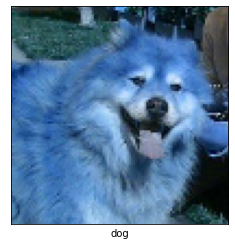

In [101]:
plt.figure(figsize = (4, 4))
plt.xticks([])
plt.yticks([])
plt.imshow(img.reshape(100, 100, 3))
plt.xlabel(index_to_class[pred[0][1]])

In [ ]:
# with transfer learning and even lesser number of parameters to train we can observe that the performance of the model shoots up.

# Xception with 100% frozen layers

In [99]:
from tensorflow.keras.applications import Xception
model_xcep = Xception(weights = 'imagenet', include_top = False, input_shape = (100, 100, 3))

83689472/83683744 [==============================] - 9s 0us/step


In [100]:
# summary of the Xception model
model_xcep.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 49, 49, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 49, 49, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 49, 49, 32)   0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [102]:
# freezing the earlier layers.
for layer in model_vgg16.layers:
    layer.trainable = False

In [103]:
model = Sequential()
# add the layers of the pretrained model : vgg16
model.add(model_vgg16)
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation = 'softmax'))

In [104]:
# summary of the hybrid model
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_7 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              4719616   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 2050      
Total params: 19,436,354
Trainable params: 4,721,666
Non-trainable params: 14,714,688
_________________________________________________________________


In [105]:
# lets compile the model

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [106]:
# lets fit the model on training data.

history = model.fit(X_train, y_train, epochs = 5, batch_size = 64, verbose = 1)

Epoch 1/5
12/12 [==============================] - 9s 723ms/step - loss: 13.5147 - accuracy: 0.8298
Epoch 2/5
12/12 [==============================] - 9s 743ms/step - loss: 2.5120 - accuracy: 0.9504
Epoch 3/5
12/12 [==============================] - 9s 789ms/step - loss: 0.9847 - accuracy: 0.9688
Epoch 4/5
12/12 [==============================] - 10s 803ms/step - loss: 0.0539 - accuracy: 0.9957
Epoch 5/5
12/12 [==============================] - 9s 792ms/step - loss: 0.0546 - accuracy: 0.9972


In [107]:
# evaluating the model on training data

score = model.evaluate(X_train, y_train)
print("Training loss : ", score[0])
print("Training loss : ", score[1])

23/23 [==============================] - 10s 415ms/step - loss: 9.5465e-06 - accuracy: 1.0000
Training loss :  9.546485671307892e-06
Training loss :  1.0


In [108]:
# evaluating the model on testing data

score = model.evaluate(X_test, y_test)
print("Testing loss : ", score[0])
print("Testing loss : ", score[1])

10/10 [==============================] - 4s 383ms/step - loss: 4.8003 - accuracy: 0.9043
Testing loss :  4.800347805023193
Testing loss :  0.9042904376983643


# Resnet 50 with 75% of layers frozen

In [109]:
from tensorflow.keras.applications import ResNet50
model_resnet = ResNet50(weights = 'imagenet', include_top = False, input_shape = (100, 100, 3))

94773248/94765736 [==============================] - 14s 0us/step


In [110]:
# summary of the resnet model
model_resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 106, 106, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 50, 50, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 50, 50, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [112]:
# freezing 75% of the earlier layers

num_layers = len(model_resnet.layers)
print(num_layers)

175


In [118]:
for layer in model_resnet.layers[: int(0.25 * num_layers)]:
    layer.trainable = False

In [120]:
# sanity check
t, f = 0, 0
for layer in model_resnet.layers:
    if layer.trainable:
        t += 1
    else:
        f += 1
print("t : ", t, " f : ", f)

t :  132  f :  43


In [121]:
model = Sequential()
model.add(model_resnet)
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation = 'softmax'))

In [122]:
# summary of the hybrid model
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
flatten_8 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 1024)              33555456  
_________________________________________________________________
dropout_8 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 2050      
Total params: 57,145,218
Trainable params: 56,684,546
Non-trainable params: 460,672
_________________________________________________________________


In [123]:
# because of freezing of 75% of layers compared to 100% layers, the number of trainable parameters have significantly increased.

In [124]:
# lets compile the model

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [125]:
# lets fit the model on training data.

history = model.fit(X_train, y_train, epochs = 5, batch_size = 64, verbose = 1)

Epoch 1/5
12/12 [==============================] - 29s 2s/step - loss: 7.6476 - accuracy: 0.6936
Epoch 2/5
12/12 [==============================] - 28s 2s/step - loss: 0.7250 - accuracy: 0.7858
Epoch 3/5
12/12 [==============================] - 28s 2s/step - loss: 0.6834 - accuracy: 0.7943
Epoch 4/5
12/12 [==============================] - 28s 2s/step - loss: 1.4155 - accuracy: 0.7787
Epoch 5/5
12/12 [==============================] - 27s 2s/step - loss: 1.2654 - accuracy: 0.8043


In [126]:
# evaluating the model on training data

score = model.evaluate(X_train, y_train)
print("Training loss : ", score[0])
print("Training loss : ", score[1])

23/23 [==============================] - 5s 227ms/step - loss: 4129074.7500 - accuracy: 0.5135
Training loss :  4129074.75
Training loss :  0.5134751796722412


In [127]:
# evaluating the model on testing data

score = model.evaluate(X_test, y_test)
print("Testing loss : ", score[0])
print("Testing loss : ", score[1])

10/10 [==============================] - 2s 214ms/step - loss: 5130350.5000 - accuracy: 0.4686
Testing loss :  5130350.5
Testing loss :  0.4686468541622162


In [130]:
# we can observe a poor performance with 75% of the layers frozen.

In [137]:
model_resnet.layers[0]

In [138]:
model_resnet.layers[-1]

# Resnet 50 with 100% of layers frozen

In [131]:
# freezing 100% of the earlier layers

num_layers = len(model_resnet.layers)
print(num_layers)

175


In [139]:
for layer in model_resnet.layers:
    layer.trainable = False

In [140]:
# sanity check
for layer in model_resnet.layers:
    assert(layer.trainable == False)

In [141]:
model = Sequential()
model.add(model_resnet)
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation = 'softmax'))

In [142]:
# summary of the hybrid model
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
flatten_9 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 1024)              33555456  
_________________________________________________________________
dropout_9 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 2050      
Total params: 57,145,218
Trainable params: 33,557,506
Non-trainable params: 23,587,712
_________________________________________________________________


In [143]:
# lets compile the model

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [144]:
# lets fit the model on training data.

history = model.fit(X_train, y_train, epochs = 5, batch_size = 64, verbose = 1)

Epoch 1/5
12/12 [==============================] - 6s 503ms/step - loss: 4401492.0000 - accuracy: 0.5404
Epoch 2/5
12/12 [==============================] - 6s 489ms/step - loss: 1141189.1250 - accuracy: 0.5149
Epoch 3/5
12/12 [==============================] - 6s 490ms/step - loss: 747701.6250 - accuracy: 0.5135
Epoch 4/5
12/12 [==============================] - 6s 517ms/step - loss: 506911.3750 - accuracy: 0.5191
Epoch 5/5
12/12 [==============================] - 6s 513ms/step - loss: 241034.5781 - accuracy: 0.5220


In [145]:
# evaluating the model on training data

score = model.evaluate(X_train, y_train)
print("Training loss : ", score[0])
print("Training loss : ", score[1])

23/23 [==============================] - 6s 245ms/step - loss: 162169.3125 - accuracy: 0.5135
Training loss :  162169.3125
Training loss :  0.5134751796722412


In [146]:
# evaluating the model on training data

score = model.evaluate(X_train, y_train)
print("Training loss : ", score[0])
print("Training loss : ", score[1])

23/23 [==============================] - 6s 248ms/step - loss: 162169.3125 - accuracy: 0.5135
Training loss :  162169.3125
Training loss :  0.5134751796722412


In [147]:
# with 100% of the layers the performance is worse. this particular model in not suited for our task.

# DenseNet with 2 extra layers added.

In [151]:
from tensorflow.keras.applications import DenseNet121
model_densenet = DenseNet121(weights = 'imagenet', include_top = False, input_shape = (100, 100, 3))

In [152]:
# summary of the densenet model
model_densenet.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_4 (ZeroPadding2D (None, 106, 106, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 50, 50, 64)   9408        zero_padding2d_4[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 50, 50, 64)   256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [153]:
# freezing the earlier layers.
for layer in model_densenet.layers:
    layer.trainable = False

In [155]:
# sanity check
for layer in model_densenet.layers:
    assert(layer.trainable == False)

In [156]:
model = Sequential()
model.add(model_densenet)
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))

In [157]:
# summary of the hybrid model
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 3, 3, 1024)        7037504   
_________________________________________________________________
flatten_10 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 1024)              9438208   
_________________________________________________________________
dropout_10 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 2)               

In [158]:
# lets compile the model

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [159]:
# lets fit the model on training data.

history = model.fit(X_train, y_train, epochs = 5, batch_size = 64, verbose = 1)

Epoch 1/5
12/12 [==============================] - 8s 674ms/step - loss: 29.1625 - accuracy: 0.5376
Epoch 2/5
12/12 [==============================] - 8s 651ms/step - loss: 13.8309 - accuracy: 0.5461
Epoch 3/5
12/12 [==============================] - 8s 674ms/step - loss: 9.1456 - accuracy: 0.5929
Epoch 4/5
12/12 [==============================] - 8s 657ms/step - loss: 4.1621 - accuracy: 0.6043
Epoch 5/5
12/12 [==============================] - 8s 672ms/step - loss: 3.2892 - accuracy: 0.6397


In [160]:
# evaluating the model on training data

score = model.evaluate(X_train, y_train)
print("Training loss : ", score[0])
print("Training loss : ", score[1])

23/23 [==============================] - 8s 359ms/step - loss: 0.5772 - accuracy: 0.7745
Training loss :  0.5771703124046326
Training loss :  0.7744680643081665


In [161]:
# evaluating the model on testing data

score = model.evaluate(X_test, y_test)
print("Testing loss : ", score[0])
print("Testing loss : ", score[1])

10/10 [==============================] - 3s 344ms/step - loss: 0.8513 - accuracy: 0.7195
Testing loss :  0.8512864112854004
Testing loss :  0.7194719314575195


# VGG19 Model

In [163]:
from tensorflow.keras.applications import VGG19
model_vgg19 = VGG19(weights = 'imagenet', include_top = False, input_shape = (100, 100, 3))

In [164]:
# summary of the model
model_vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [165]:
# freezing the earlier layers.
for layer in model_vgg19.layers:
    layer.trainable = False

In [166]:
# sanity check
for layer in model_vgg16.layers:
    assert(layer.trainable == False)

In [168]:
model = Sequential()
# add the layers of the pretrained model : vgg16
model.add(model_vgg19)
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation = 'softmax'))

In [169]:
# summary of the hybrid model
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 3, 3, 512)         20024384  
_________________________________________________________________
flatten_12 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 1024)              4719616   
_________________________________________________________________
dropout_13 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 2050      
Total params: 24,746,050
Trainable params: 4,721,666
Non-trainable params: 20,024,384
_________________________________________________________________


In [170]:
# lets compile the model

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [171]:
# lets fit the model on training data.

history = model.fit(X_train, y_train, epochs = 5, batch_size = 64, verbose = 1)

Epoch 1/5
12/12 [==============================] - 15s 1s/step - loss: 18.7755 - accuracy: 0.7929
Epoch 2/5
12/12 [==============================] - 15s 1s/step - loss: 2.3767 - accuracy: 0.9518
Epoch 3/5
12/12 [==============================] - 15s 1s/step - loss: 0.2213 - accuracy: 0.9887
Epoch 4/5
12/12 [==============================] - 15s 1s/step - loss: 0.2672 - accuracy: 0.9929
Epoch 5/5
12/12 [==============================] - 15s 1s/step - loss: 0.1011 - accuracy: 0.9943


In [172]:
# evaluating the model on training data

score = model.evaluate(X_train, y_train)
print("Training loss : ", score[0])
print("Training loss : ", score[1])

23/23 [==============================] - 16s 700ms/step - loss: 2.6760e-05 - accuracy: 1.0000
Training loss :  2.6760331820696592e-05
Training loss :  1.0


In [173]:
# evaluating the model on testing data

score = model.evaluate(X_test, y_test)
print("Training loss : ", score[0])
print("Testing loss : ", score[1])

10/10 [==============================] - 6s 624ms/step - loss: 4.5964 - accuracy: 0.9241
Training loss :  4.596423625946045
Testing loss :  0.9240924119949341
